In [1]:
import os,sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
import numpy as np
import seaborn as sns

### CASF2016 screening power enrichment factor

In [3]:
csvfn = "./screening_power_EF_all.csv"
data = pd.read_csv(csvfn)

In [4]:
data.head()

,ScoringFunc,Rank,Top1%,Top5%,Top10%,ci_90_lower,ci_90_higher
0,ChemPLP@GOLD,1,11.91,5.29,3.59,9.08,15.50
1,ΔVinaRF20,1,11.73,4.43,3.10,8.84,15.41
2,GlideScore-SP,1,11.44,5.83,3.98,8.59,14.84
3,GlideScore-XP,2,8.83,4.75,3.51,6.42,11.79
4,ChemScore@GOLD,2,8.65,3.95,2.92,6.46,11.58


In [5]:
# this is simple entropy, no cst, ligand only minimization
# values are from ./power_screening/GALigandDockScreeningPower_simple_relax_lig_nocst.out
data.loc[len(data)] = ['RosettaGenFF-VS-Simple', 1, 16.72, 7.28, 4.47, 13.10, 20.97]

# # this is mcentropy with no cst, ligand only minimization
# values are from ./power_screening/GALigandDockScreeningPower_MCEntropy_relax_lig_no_cst.out
data.loc[len(data)] = ['RosettaGenFF-VS-Default', 1, 15.22, 7.37, 4.79, 11.73, 19.41]

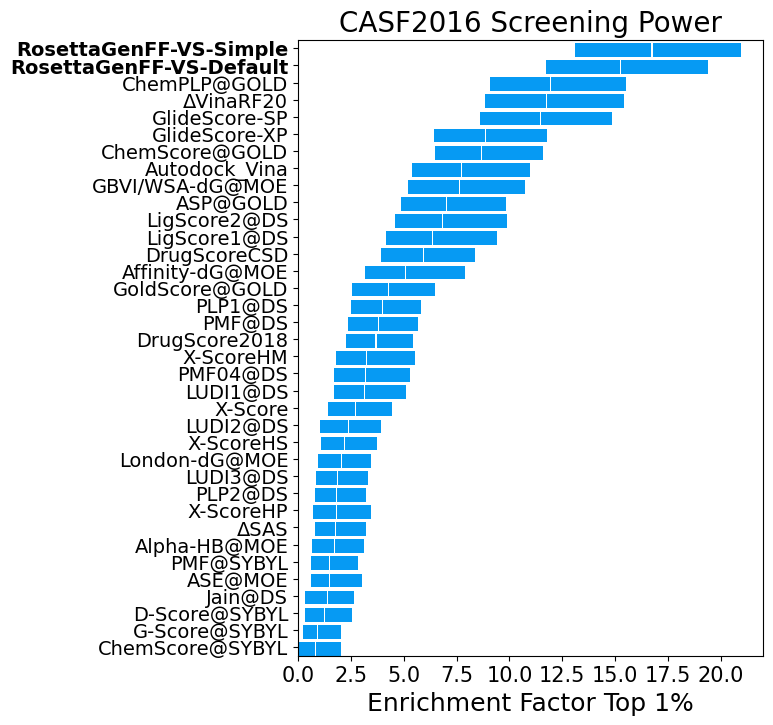

In [6]:
fig, ax = plt.subplots(figsize=(6,8))
data.sort_values(by="Top1%", ascending=True, inplace=True)
y_stepsize = 5
for i in range(len(data)):
    mean = data.iloc[i]['Top1%']
    xmin = data.iloc[i]['ci_90_lower']
    xwidth = data.iloc[i]['ci_90_higher']-data.iloc[i]['ci_90_lower']
    ax.broken_barh([(xmin, xwidth), (mean, 0.05)], (y_stepsize*(i+1), 4), facecolors=('xkcd:azure', 'xkcd:white'))

ax.set_yticks([y_stepsize*(i+1)+0.5*y_stepsize for i in range(len(data))], labels=list(data["ScoringFunc"]), fontsize=14)
plt.xticks(fontsize=15)
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS-Simple' or label.get_text() == 'RosettaGenFF-VS-Default':
        label.set_fontproperties(font)
plt.yticks(fontsize=14)
ax.set_ylim(y_stepsize, y_stepsize*(len(data)+1))
ax.set_xlim(0, 22)
ax.set_xlabel('Enrichment Factor Top 1%', fontsize=18)
ax.set_title('CASF2016 Screening Power', fontsize=20)
plt.savefig("CASF2016_screening_power_EF.all.svg", dpi=300, bbox_inches='tight')

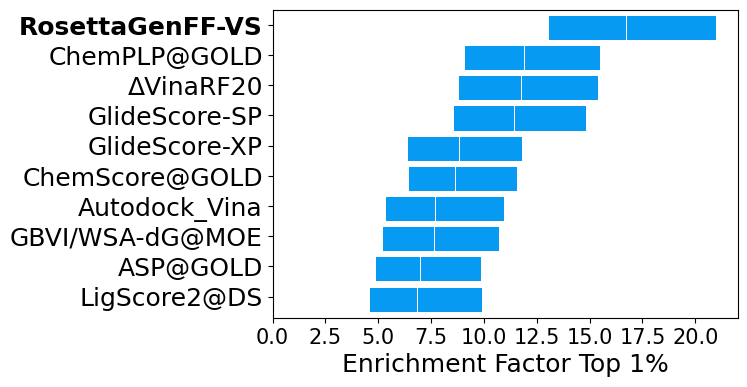

In [18]:
csvfn = "./screening_power_EF_all.csv"
data = pd.read_csv(csvfn)

# this is simple entropy, no cst, ligand only minimization, current best
data.loc[len(data)] = ['RosettaGenFF-VS', 1, 16.72, 7.28, 4.47, 13.10, 20.97]

nreport=10
fig, ax = plt.subplots(figsize=(6,4))
data.sort_values(by="Top1%", ascending=True, inplace=True)
data_new = data.iloc[-nreport:] # reversed order
y_stepsize = 2.5
for i in range(len(data_new)):
    mean = data_new.iloc[i]['Top1%']
    xmin = data_new.iloc[i]['ci_90_lower']
    xwidth = data_new.iloc[i]['ci_90_higher']-data_new.iloc[i]['ci_90_lower']
    ax.broken_barh([(xmin, xwidth), (mean, 0.05)], (y_stepsize*(i+1), 2), facecolors=('xkcd:azure', 'xkcd:white'))
ax.set_yticks([y_stepsize*(i+1)+0.5*y_stepsize for i in range(len(data_new))], labels=list(data_new["ScoringFunc"]), fontsize=18)
plt.xticks(fontsize=15)
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS':
        label.set_fontproperties(font)
plt.yticks(fontsize=18)
ax.set_ylim(y_stepsize-0.5, y_stepsize*(len(data_new)+1))
ax.set_xlim(0, 22)
ax.set_xlabel('Enrichment Factor Top 1%', fontsize=18)
#ax.set_title('CASF2016 Screening Power', fontsize=20)
plt.savefig(f"CASF2016_screening_power_EF.top{nreport}.svg", dpi=300, bbox_inches='tight')


### CASF2016 forward screening power success rate

In [5]:
csvfn = "./screening_power_success_rate_all.csv"
df = pd.read_csv(csvfn)

In [6]:
df.head()

,Scoringfunc,Rank,Success_rate_Top1%,Success_rate_Top5%,Success_rate_Top10%,ci_90_lower,ci_90_higher
0,ΔVinaRF20,1,0.421,0.491,0.544,0.298,0.509
1,GlideScore-SP,2,0.368,0.544,0.632,0.246,0.456
2,ChemPLP@GOLD,3,0.351,0.614,0.649,0.228,0.439
3,AutodockVina,4,0.298,0.404,0.509,0.193,0.386
4,ChemScore@GOLD,5,0.281,0.456,0.579,0.175,0.368


In [7]:
# manually add entry here
# report simple entropy model with no cst, ligand only minimization as GALigandDock
# df.loc[len(df)] = ['RosettaGenFF-VS', 1, 0.491, 0.772, 0.86, 0.3684, 0.5789]
df.loc[len(df)] = ['RosettaGenFF-VS-Simple', 1, 0.491, 0.772, 0.86, 0.3684, 0.5789]
# df.loc[len(df)] = ['GALigandDock-Simple-hard-cst', 1, 0.421, 0.579, 0.667, 0.0, 0.0]
df.loc[len(df)] = ['RosettaGenFF-VS-Default', 1, 0.474, 0.807, 0.842, 0, 0]
df.drop_duplicates(subset=['Scoringfunc'], keep='first', inplace=True)

In [8]:
df.sort_values(by=["Success_rate_Top1%", "Success_rate_Top5%", "Success_rate_Top10%"] , ascending=True, inplace=True)
df.tail()

,Scoringfunc,Rank,Success_rate_Top1%,Success_rate_Top5%,Success_rate_Top10%,ci_90_lower,ci_90_higher
2,ChemPLP@GOLD,3,0.351,0.614,0.649,0.2280,0.4390
1,GlideScore-SP,2,0.368,0.544,0.632,0.2460,0.4560
0,ΔVinaRF20,1,0.421,0.491,0.544,0.2980,0.5090
35,RosettaGenFF-VS-Default,1,0.474,0.807,0.842,0.0000,0.0000
34,RosettaGenFF-VS-Simple,1,0.491,0.772,0.860,0.3684,0.5789


In [9]:
fields = ["Success_rate_Top1%","Success_rate_Top5%","Success_rate_Top10%"]
colors = ['xkcd:azure', 'lime', 'coral']
labels = ["Top 1%","Top 5%","Top 10%"]

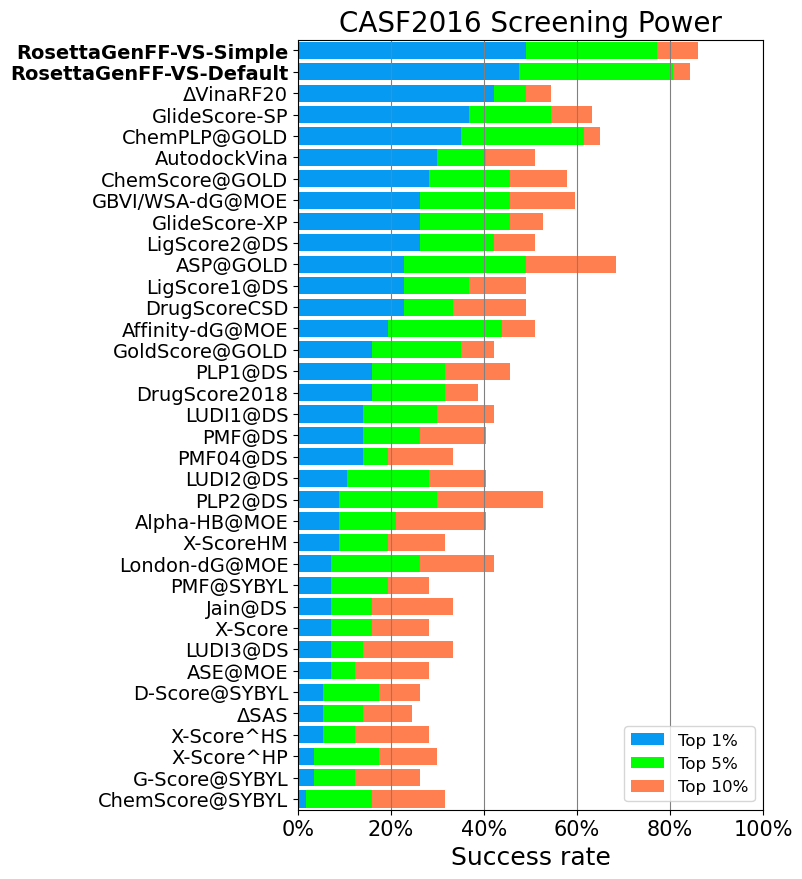

In [10]:
fig, ax = plt.subplots(1, figsize=(6, 10))
left = np.zeros(len(df))
for i, name in enumerate(fields):
    plt.barh(df['Scoringfunc'], df[name]-left, left=left, color=colors[i])
    left = df[name]
plt.legend(labels, ncol=1, frameon=True, fontsize=12)
xticks = np.arange(0,1.1,0.2)
xlabels = [f'{i:.0%}' for i in np.arange(0,1.1,0.2)]
plt.xticks(xticks, xlabels, fontsize=15)
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS-Simple' or label.get_text() == 'RosettaGenFF-VS-Default':
        label.set_fontproperties(font)
plt.yticks(fontsize=14)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.xaxis.grid(color='gray', linestyle='solid')
ax.set_xlabel("Success rate", fontsize=18)
plt.title(f"CASF2016 Screening Power", fontsize=20)
plt.savefig("CASF2016_screening_power_success_rate.svg", dpi=300, bbox_inches='tight')

### Report top methods for the figure in MS

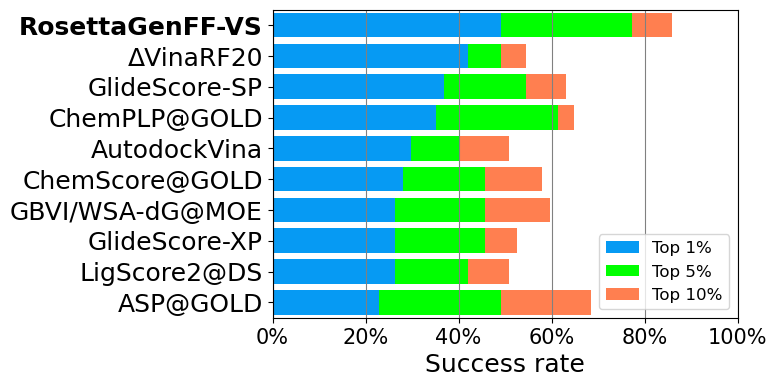

In [17]:
csvfn = "./screening_power_success_rate_all.csv"
df = pd.read_csv(csvfn)

# report simple entropy model with no cst, ligand only minimization as GALigandDock
df.loc[len(df)] = ['RosettaGenFF-VS', 1, 0.491, 0.772, 0.86, 0.3684, 0.5789]

df.sort_values(by=["Success_rate_Top1%", "Success_rate_Top5%", "Success_rate_Top10%"] , ascending=True, inplace=True)
fields = ["Success_rate_Top1%","Success_rate_Top5%","Success_rate_Top10%"]
colors = ['xkcd:azure', 'lime', 'coral']
labels = ["Top 1%","Top 5%","Top 10%"]
nreport=10
fig, ax = plt.subplots(1, figsize=(6, 4))
df_new  = df.iloc[-nreport:] # reversed order
left = np.zeros(len(df_new))
for i, name in enumerate(fields):
    plt.barh(df_new['Scoringfunc'], df_new[name]-left, left=left, color=colors[i])
    left = df_new[name]
plt.legend(labels, ncol=1, frameon=True, fontsize=12)
xticks = np.arange(0,1.1,0.2)
xlabels = [f'{i:.0%}' for i in np.arange(0,1.1,0.2)]
plt.xticks(xticks, xlabels, fontsize=15)
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS':
        label.set_fontproperties(font)
plt.yticks(fontsize=18)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.xaxis.grid(color='gray', linestyle='solid')
ax.set_xlabel("Success rate", fontsize=18)
#plt.title(f"CASF2016 Screening Power", fontsize=20)
plt.savefig(f"CASF2016_screening_power_success_rate.top{nreport}.svg", dpi=300, bbox_inches='tight')


### CASF2016 reverse screening power success rate

In [19]:
csvfn = "./screening_power_reverse_success_rate_all.csv"
df = pd.read_csv(csvfn)

In [20]:
df.head()

,Scoringfunc,Rank,Success_rate_Top1%,Success_rate_Top5%,Success_rate_Top10%,ci_90_lower,ci_90_higher
0,RosettaGenFF-VS-Default,1,0.172,0.333,0.432,0.000,0.000
1,ChemPLP@GOLD,1,0.175,0.291,0.411,0.137,0.211
2,GlideScore-SP,2,0.165,0.270,0.375,0.126,0.200
3,DrugScoreCSD,3,0.154,0.239,0.330,0.119,0.190
4,ΔVinaRF20,4,0.151,0.249,0.316,0.116,0.186


In [21]:
df.loc[len(df)] = ['RosettaGenFF-VS-Simple', 1, 0.204, 0.379, 0.477, 0.0, 0.0]
#df.loc[len(df)] = ['GALigandDock-Simple-hard-cst', 1, 0.189, 0.316, 0.400, 0.0, 0.0]

In [22]:
df.sort_values(by=["Success_rate_Top1%", "Success_rate_Top5%"], ascending=True, inplace=True)
df.tail()

,Scoringfunc,Rank,Success_rate_Top1%,Success_rate_Top5%,Success_rate_Top10%,ci_90_lower,ci_90_higher
3,DrugScoreCSD,3,0.154,0.239,0.330,0.119,0.190
2,GlideScore-SP,2,0.165,0.270,0.375,0.126,0.200
0,RosettaGenFF-VS-Default,1,0.172,0.333,0.432,0.000,0.000
1,ChemPLP@GOLD,1,0.175,0.291,0.411,0.137,0.211
35,RosettaGenFF-VS-Simple,1,0.204,0.379,0.477,0.000,0.000


In [23]:
fields = ["Success_rate_Top1%","Success_rate_Top5%","Success_rate_Top10%"]
colors = ['xkcd:azure', 'lime', 'coral']
labels = ["Top 1%","Top 5%","Top 10%"]

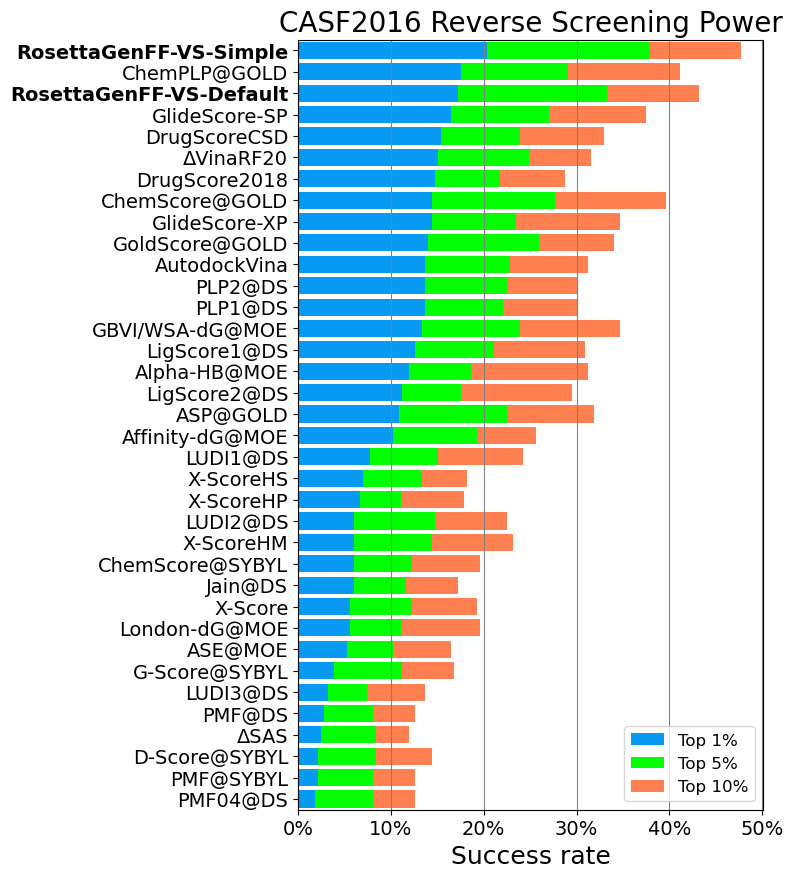

In [24]:
fig, ax = plt.subplots(1, figsize=(6, 10))
left = np.zeros(len(df))
for i, name in enumerate(fields):
    plt.barh(df['Scoringfunc'], df[name]-left, left=left, color=colors[i])
    left = df[name]
plt.legend(labels, ncol=1, frameon=True, fontsize=12)
xticks = np.arange(0,0.6,0.1)
xlabels = [f'{i:.0%}' for i in xticks]
plt.xticks(xticks, xlabels, fontsize=14)
# Create a font object
font = font_manager.FontProperties(weight='bold')

# Loop over ytick labels and set font properties
for label in ax.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS-Simple' or label.get_text() == 'RosettaGenFF-VS-Default':
        label.set_fontproperties(font)
plt.yticks(fontsize=14)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.xaxis.grid(color='gray', linestyle='solid')
ax.set_xlabel("Success rate", fontsize=18)
plt.title(f"CASF2016 Reverse Screening Power", fontsize=20)
plt.savefig("CASF2016_reverse_screening_power_success_rate.svg", dpi=300, bbox_inches='tight')

### Forward screening Top 1% success rate subset

In [26]:
resultfn = "./power_screening/GALigandDock-Score-Simple-RelaxLig_Top1.dat"
#resultfn = "./power_screening/GALigandDock-Score-MCEntropy-RelaxLig-no-cst_Top1.dat"

In [27]:
top1sucess = {}
with open(resultfn, 'r') as infh:
    for l in infh:
        if l.startswith('#'): continue
        trg, sucess = l.strip().split()[:][0], int(l.strip().split()[:][1])
        top1sucess[trg] = sucess

In [28]:
len(top1sucess)

57

In [29]:
def read_subset_trgs(subsetfn):
    with open(subsetfn, 'r') as infh:
        for l in infh:
            if l.startswith('#'): continue
            subset_trgs = [l.strip().split()[0] for l in infh]
    return subset_trgs

In [31]:
def get_success_rate(data_all, trgs):
    sucess_rate = 0.0
    for trg in trgs:
        sucess_rate += data_all[trg]
    return sucess_rate/len(trgs)

In [32]:
subset_tags = ['H1', 'H2', 'H3', 'S1', 'S2', 'S3', 'V1', 'V2', 'V3']
for tag in subset_tags:
    subsetfn= f"./power_screening/subset-{tag}.dat"
    subset_trgs = read_subset_trgs(subsetfn)
    subset_trgs = set(subset_trgs) & top1sucess.keys()
    success_rate = get_success_rate(top1sucess, subset_trgs)
    print(f"Subset {tag}, success rate {success_rate:.1%}")

Subset H1, success rate 36.8%
Subset H2, success rate 47.4%
Subset H3, success rate 63.2%
Subset S1, success rate 52.6%
Subset S2, success rate 38.1%
Subset S3, success rate 58.8%
Subset V1, success rate 31.6%
Subset V2, success rate 52.6%
Subset V3, success rate 63.2%


### Plot forward screening subset Top 1% success rate

In [33]:
# The above RosettaGenFF results were manually added to the csv file
csvfn="./power_screening/screening_power_forward_subset.csv"
df = pd.read_csv(csvfn)
df.set_index('Scoring Function', inplace=True)
df.head()


,Entire test set,H1,H2,H3,S1,S2,S3,V1,V2,V3
Scoring Function,,,,,,,,,,
RosettaGenFF-VS-Simple,0.491,0.368,0.474,0.632,0.526,0.381,0.588,0.316,0.526,0.632
RosettaGenFF-VS-Default,0.474,0.368,0.579,0.474,0.421,0.381,0.647,0.263,0.474,0.684
ΔVinaRF20,0.421,0.263,0.368,0.632,0.368,0.381,0.529,0.263,0.526,0.474
GlideScore-SP,0.368,0.316,0.316,0.474,0.316,0.429,0.353,0.263,0.316,0.526
ChemPLP@GOLD,0.351,0.158,0.474,0.421,0.263,0.286,0.529,0.105,0.368,0.579


In [34]:
df.loc[:,'Entire test set':'Entire test set']

,Entire test set
Scoring Function,
RosettaGenFF-VS-Simple,0.491
RosettaGenFF-VS-Default,0.474
ΔVinaRF20,0.421
GlideScore-SP,0.368
ChemPLP@GOLD,0.351
AutodockVina,0.298
ChemScore@GOLD,0.281
GBVI/WSA-dG@MOE,0.263
GlideScore-XP,0.263


None


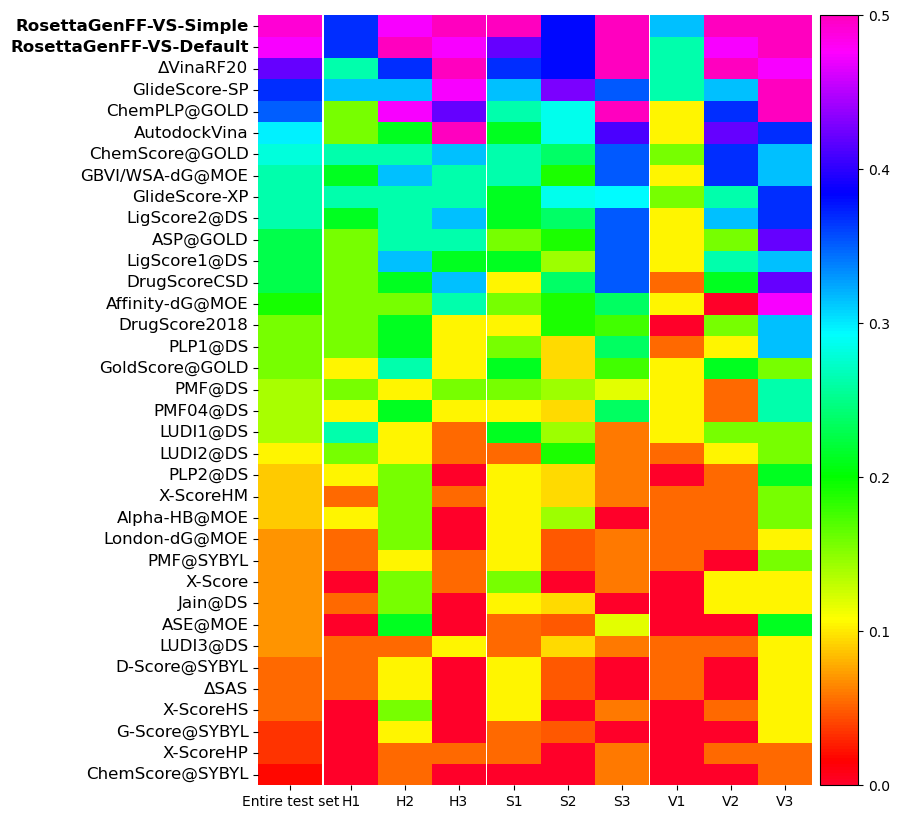

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(10,10))
fig.subplots_adjust(wspace=0.01)
cmap = "gist_rainbow"
sns.heatmap(df.loc[:,'Entire test set':'Entire test set'], cmap=cmap, ax=ax1, cbar=False, vmin=0.0, vmax=0.5)
# Loop over ytick labels and set font properties
for label in ax1.get_yticklabels():
    if label.get_text() == 'RosettaGenFF-VS-Simple' or label.get_text() == 'RosettaGenFF-VS-Default':
        label.set_fontproperties(font)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_ylabel('')
#fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=False, pad=0.2)
print(ax1.set_box_aspect(12))
sns.heatmap(df.loc[:,'H1':'H3'], cmap=cmap, ax=ax2, cbar=False, vmin=0.0, vmax=0.5)
ax2.get_yaxis().set_visible(False)
sns.heatmap(df.loc[:,'S1':'S3'], cmap=cmap, ax=ax3, cbar=False, vmin=0.0, vmax=0.5)
ax3.get_yaxis().set_visible(False)
sns.heatmap(df.loc[:,'V1':'V3'], cmap=cmap, ax=ax4, cbar=False, vmin=0.0, vmax=0.5)
ax4.get_yaxis().set_visible(False)
fig.colorbar(ax1.collections[0], ax=(ax1, ax2, ax3, ax4), location="right", use_gridspec=False, pad=0.01)
plt.savefig("CASF2016_screening_power_subset.svg", dpi=300, bbox_inches='tight')